# Car Price Prediction | Data Analysis | Regression | Random forest


In [97]:
##importing library files

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [98]:
##importing data file

dataset = pd.read_csv('CarPrice_Assignment.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [99]:
dataset.head()
# dataset.columns
# dataset.rpow

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [100]:
#function to check data type, unique entries, null entries in particular column

def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [101]:
check(dataset)

,column,dtypes,nunique,sum_null
0,car_ID,int64,205,0
1,symboling,int64,6,0
2,CarName,object,147,0
3,fueltype,object,2,0
4,aspiration,object,2,0
5,doornumber,object,2,0
6,carbody,object,5,0
7,drivewheel,object,3,0
8,enginelocation,object,2,0
9,wheelbase,float64,53,0


In [102]:
# Data cleaning
# as we see car_ID is not useful,let's drop this column
dataset.drop('car_ID',axis=1,inplace=True)

In [103]:
# splitting the car name and selecting the first name that we want 
dataset['CarName'] = dataset['CarName'].str.split(' ',expand=True)[0]

dataset.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [104]:
# let's print unique car name
dataset['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [105]:
# changing the false name of the car
dataset['CarName']=dataset['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [106]:
dataset['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [107]:
#changing datatype of symboling to str
dataset['symboling']=dataset['symboling'].astype('str')

#creating catogerical data columns
categorical_cols=dataset.select_dtypes(include=['object']).columns



In [108]:
dataset[categorical_cols].head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


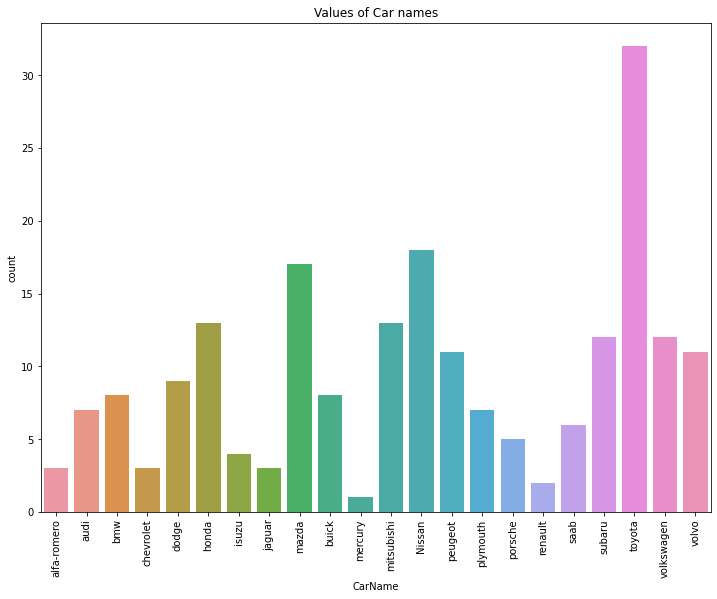

In [109]:
plt.figure(figsize=(12,9))
sns.countplot(x='CarName',data=dataset)
plt.xticks(rotation=90)
plt.title('Values of Car names')
plt.show()

# Data visualisation


array([[<AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>,
        <AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'carheight'}>],
       [<AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>,
        <AxesSubplot:title={'center':'boreratio'}>,
        <AxesSubplot:title={'center':'stroke'}>],
       [<AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'citympg'}>],
       [<AxesSubplot:title={'center':'highwaympg'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

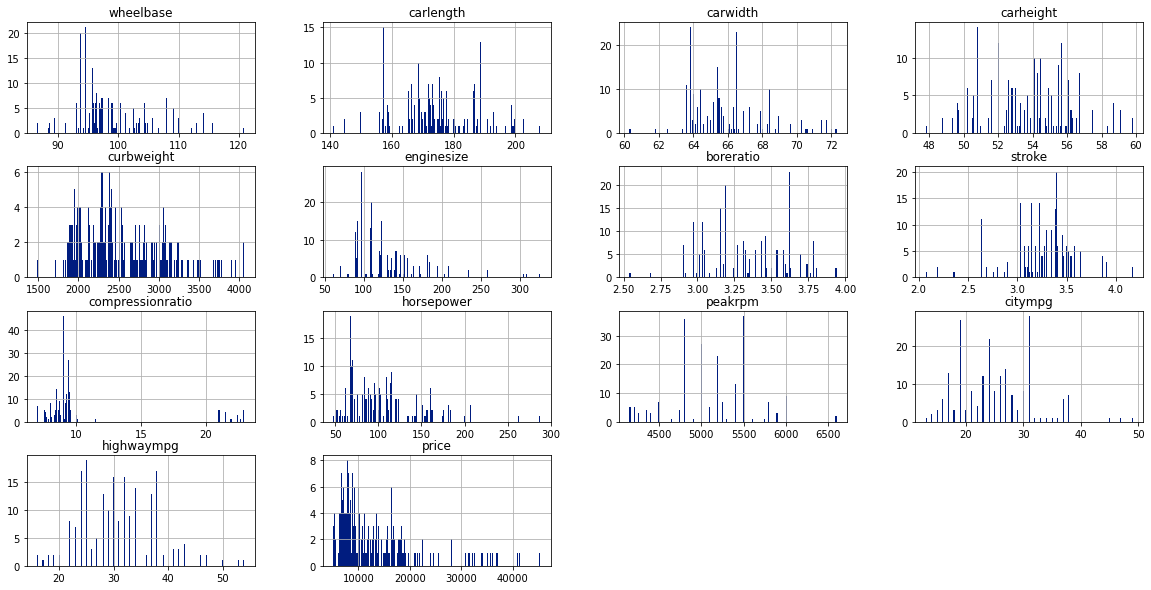

In [110]:
dataset.hist(bins=200,figsize=[20,10])

In [111]:
#definig function to print pie chart
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.1f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

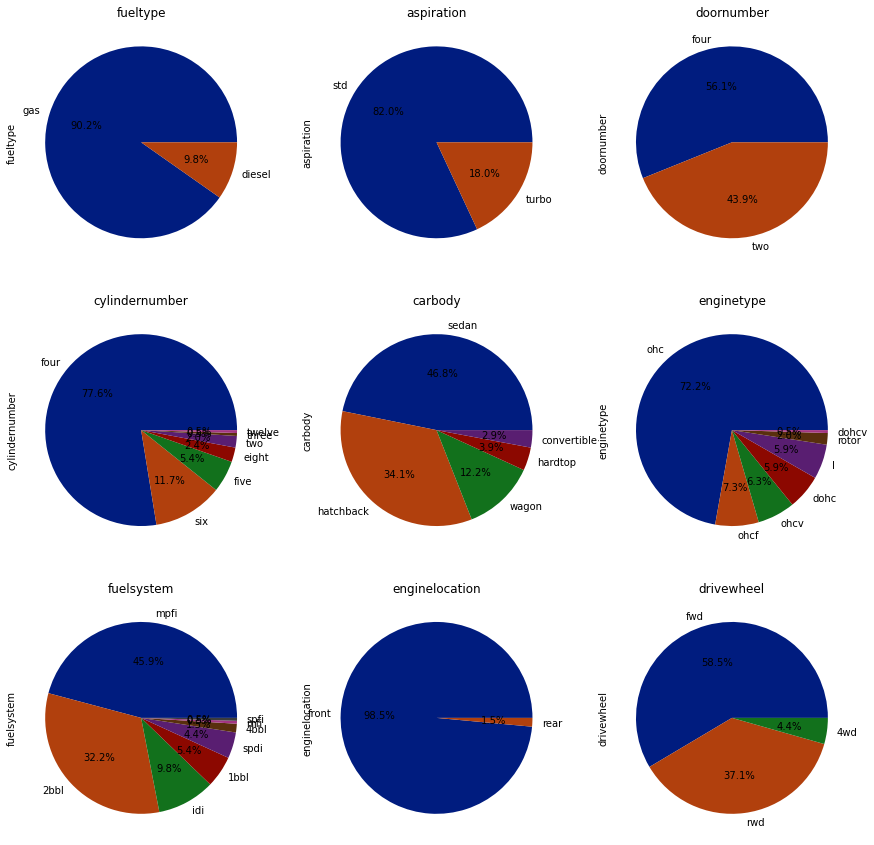

In [112]:
pie_plot(dataset, ['fueltype', 'aspiration', 'doornumber', 'cylindernumber', 'carbody', 'enginetype', 'fuelsystem', 'enginelocation', 'drivewheel'], 3, 3)

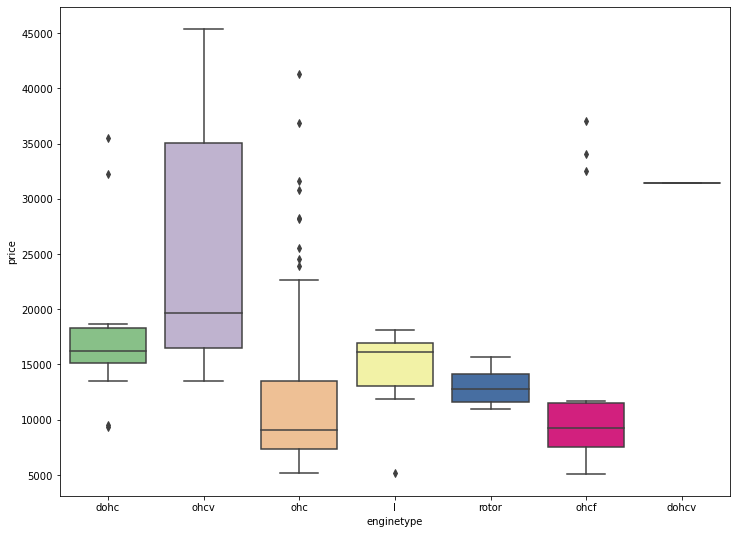

In [113]:
plt.figure(figsize=(12,9))
sns.boxplot(x = 'enginetype', y = 'price', data = dataset,palette='Accent')

plt.show()

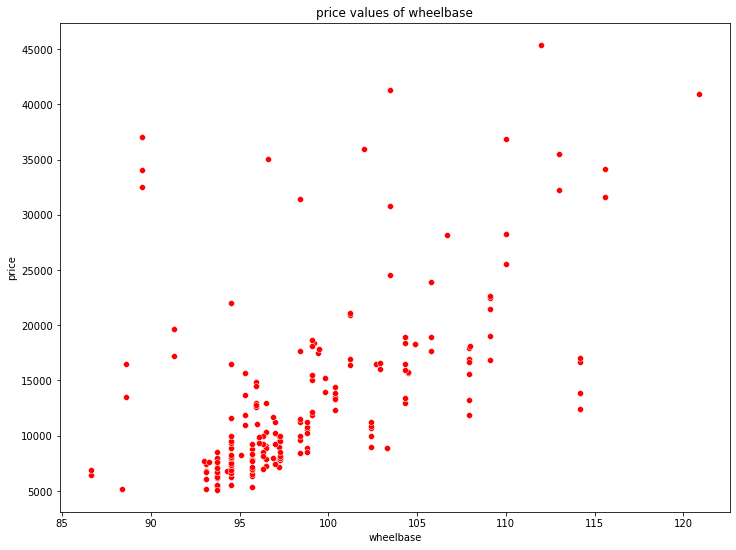

In [114]:
plt.figure(figsize=(12,9))
sns.scatterplot(x="wheelbase", y="price", data=dataset,color='red')
plt.title('price values of wheelbase')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


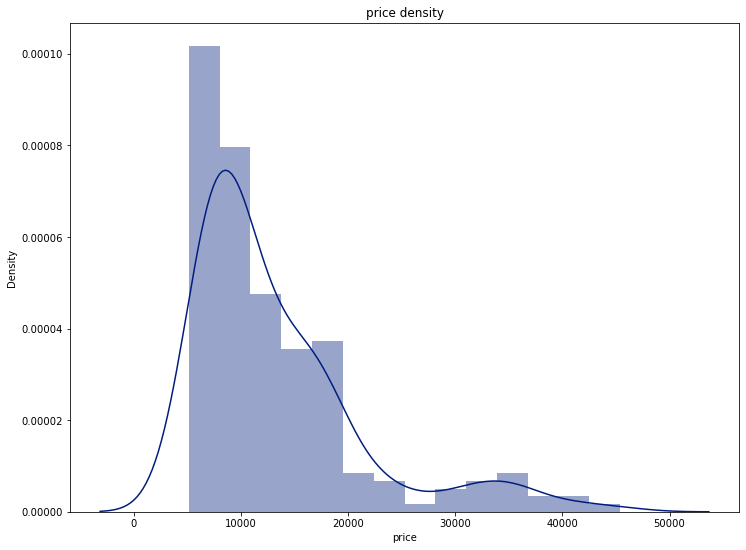

In [115]:
plt.figure(figsize=(12,9))
sns.distplot(dataset['price'])
plt.title('price density')
plt.show()

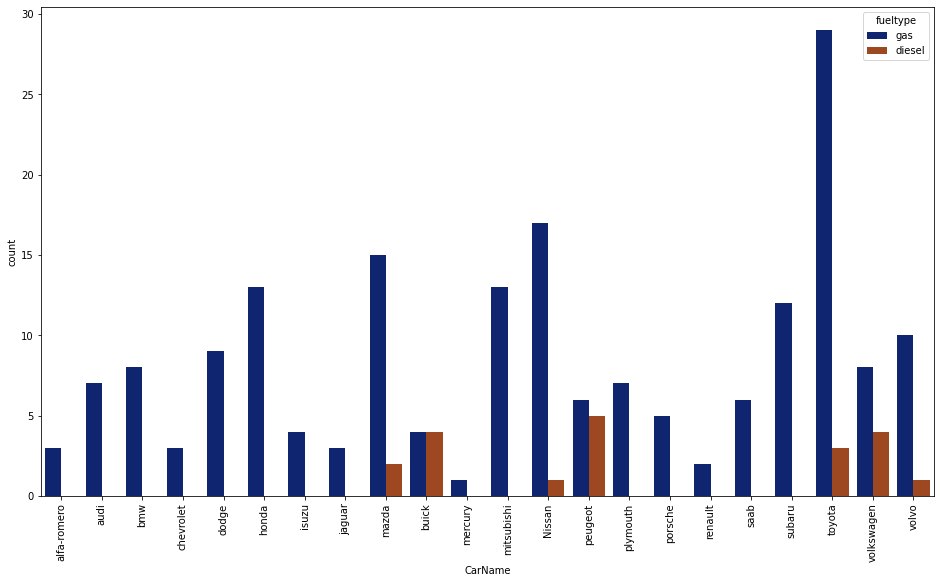

In [116]:
sns.set_palette('dark')
plt.figure(figsize=(16,9))
sns.countplot(x='CarName', hue='fueltype', data=dataset)
plt.xticks(rotation=90)
plt.show()

# Convert categorical variable into dummy/indicator variables



In [117]:
df = pd.get_dummies(dataset)

In [118]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_Nissan,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# Linear Regression

In [119]:
from sklearn.model_selection import train_test_split
x = df.drop(['price',],axis=1)
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=33)

In [120]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def visualize(data):
    for c in data.columns:
        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize":(8, 5)})
        if data[c].dtype=='int64' or data[c].dtype=='float64':
            f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
            plt.gca().set(xlabel= c,ylabel='Frequency')
            sns.boxplot(data[c], ax=ax_box , linewidth= 1.0)
            sns.histplot(data[c], ax=ax_hist , bins = 10,kde=True)
        else:
            plt.gca().set(xlabel= c,ylabel='Frequency')
            sns.histplot(data[c], bins = 10)
            
            
def evaluate(model,x_train , y_train, x_test , y_test, y_predict):
    print(f'score x_train , y_train : {model.score(x_train , y_train)}')
    print(f'score x_test , y_test : {model.score(x_test , y_test)}')
    print(f'r2_score : {r2_score(y_test, y_predict)}')
    print(f'mean absolute err : {mean_absolute_error(y_predict, y_test)}')
    print(f'mean squared err : {mean_squared_error(y_test, y_predict)}')

In [122]:
y_pred = regressor.predict(x_test)
evaluate(regressor,x_train , y_train, x_test , y_test, y_pred)

score x_train , y_train : 0.9661948391297149
score x_test , y_test : 0.8902723652965676
r2_score : 0.8902723652965676
mean absolute err : 1986.4353266176931
mean squared err : 8695510.204623025


<AxesSubplot:xlabel='price'>

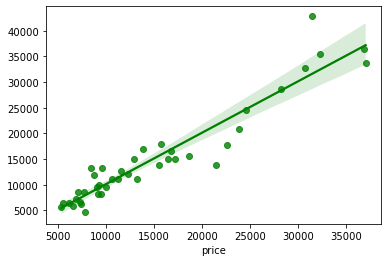

In [123]:
#graph plotting
sns.regplot(x=y_test,y=y_pred, color='green')

# Random forest


In [124]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [125]:
y_pred = regressor.predict(x_test)
evaluate(regressor,x_train , y_train, x_test , y_test, y_pred)

score x_train , y_train : 0.986441675393681
score x_test , y_test : 0.9089730014166086
r2_score : 0.9089730014166086
mean absolute err : 1917.524795121951
mean squared err : 7213553.789046775


<AxesSubplot:xlabel='price'>

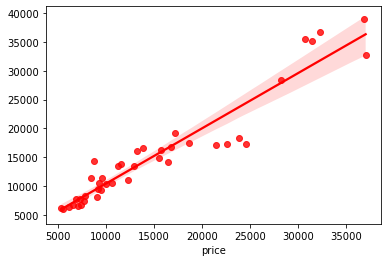

In [126]:
#graph plotting
sns.regplot(x=y_test,y=y_pred, color='red')

# Gradient boosting

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor ()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [128]:
y_pred = gbr.predict(x_test)
evaluate(gbr,x_train , y_train, x_test , y_test, y_pred)

score x_train , y_train : 0.9934327467029541
score x_test , y_test : 0.9063894168101121
r2_score : 0.9063894168101121
mean absolute err : 1902.701708155538
mean squared err : 7418293.336846346


<AxesSubplot:xlabel='price'>

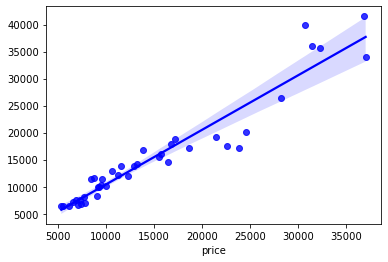

In [129]:
#graph plotting
sns.regplot(x=y_test,y=y_pred, color='blue')

# XG Boosting

In [130]:
#import the library file and train the model
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [131]:
y_pred = xgbr.predict(x_test)
evaluate(xgbr,x_train , y_train, x_test , y_test, y_pred)

score x_train , y_train : 0.9989504023731232
score x_test , y_test : 0.8791239088113069
r2_score : 0.8791239088113069
mean absolute err : 2033.55078125
mean squared err : 9578984.24828933


<AxesSubplot:xlabel='price'>

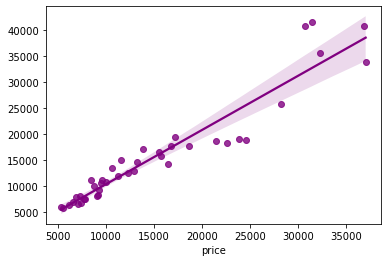

In [132]:
#graph plotting
sns.regplot(x=y_test,y=y_pred, color='purple')